In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(url):
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        Path('datasets').mkdir(exist_ok= True,parents=True)
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as file:
            file.extractall(path='datasets')
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data("https://github.com/ageron/data/raw/main/housing.tgz")

In [2]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Matplotlib created a temporary cache directory at C:\Users\pinan\AppData\Local\Temp\matplotlib-kthphu1x because the default path (C:\Users\pinan\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


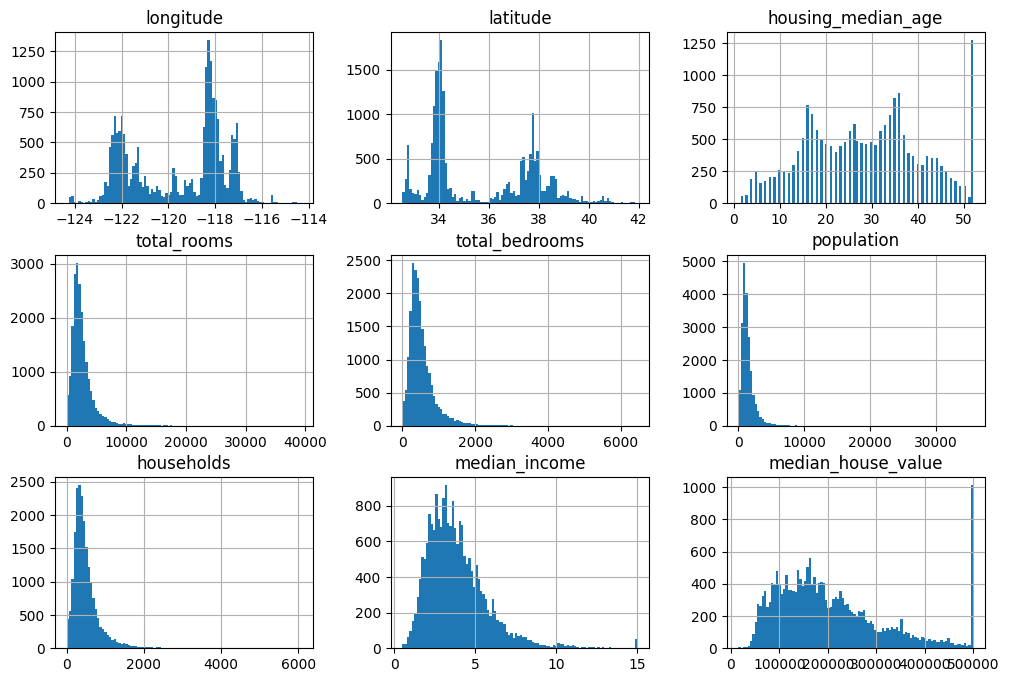

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins = 100, figsize=(12, 8))
plt.show()

In [4]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

In [11]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [5]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [6]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [7]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [11]:
housing_labels.head(5)

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [8]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__ (self, n_clusters = 10, random_state = None, gamma = 1.0):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self,x,y=None,sample_weight = None):
        X = check_array(x)
        self.kmeans_ = KMeans(self.n_clusters,random_state = self.random_state)
        self.kmeans_.fit(x,sample_weight = sample_weight)
        return self
    
    def transform(self,x):
        check_is_fitted(self) 
        x = check_array(x)
        return rbf_kernel(x, self.kmeans_.cluster_centers_,gamma = self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster_{i}_similarity" for i in range(self.n_clusters)]

    
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=0.1, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],sample_weight = housing_labels)


In [10]:
similarities[:3].round(2)

array([[0.02, 1.  , 0.19, 0.01, 0.5 , 0.41, 0.81, 0.94, 0.05, 0.94],
       [0.96, 0.06, 0.8 , 0.72, 0.  , 0.44, 0.07, 0.02, 1.  , 0.11],
       [0.02, 0.96, 0.16, 0.  , 0.63, 0.44, 0.93, 0.95, 0.04, 0.88]])

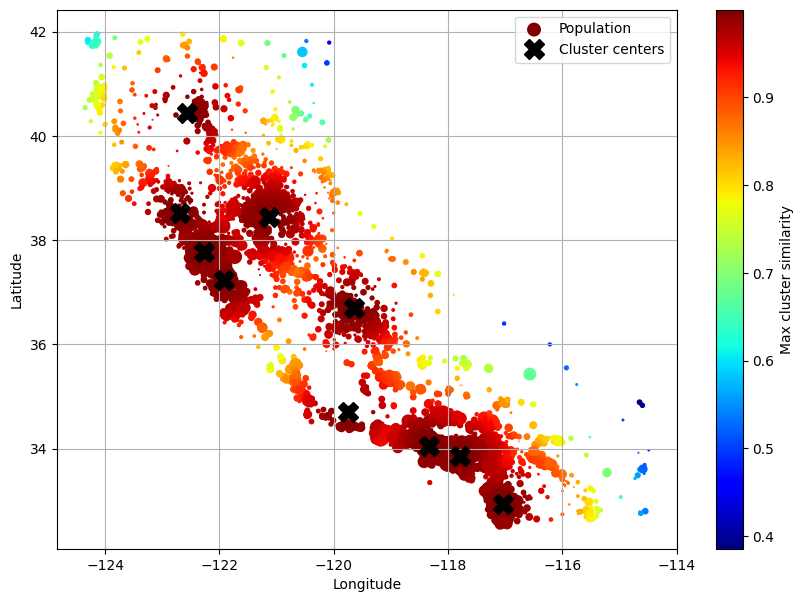

In [15]:

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_folium_lat = housing_renamed['Latitude'].mean()
housing_folium_long = housing_renamed['Longitude'].mean()



housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=15,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

In [45]:
cluster_df = pd.DataFrame({
    'Latitude' : cluster_simil.kmeans_.cluster_centers_[:,0],
    'Longitude' : cluster_simil.kmeans_.cluster_centers_[:,1]
})
cluster_df.head(10)

,Latitude,Longitude
0,33.850602,-117.783566
1,37.781349,-122.278372
2,34.699489,-119.754460
3,32.941701,-117.032855
4,40.431720,-122.558489
5,36.705457,-119.646700
6,38.449206,-121.138880
7,38.516880,-122.694425
8,34.060085,-118.332884
9,37.228730,-121.916865


In [22]:
housing_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitude               16512 non-null  float64
 1   Latitude                16512 non-null  float64
 2   housing_median_age      16512 non-null  float64
 3   total_rooms             16512 non-null  float64
 4   total_bedrooms          16344 non-null  float64
 5   Population              16512 non-null  float64
 6   households              16512 non-null  float64
 7   median_income           16512 non-null  float64
 8   ocean_proximity         16512 non-null  object 
 9   Max cluster similarity  16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
import folium
import branca.colormap as cm


base_map = folium.Map(location=[housing_folium_lat,housing_folium_long],zoom_start=4)
color_scale = cm.linear.Set1_06.scale(housing_renamed['Max cluster similarity'].min(),
                                        housing_renamed['Max cluster similarity'].max())
# folium.LinearColormap(colors = ['#E54F29','yellow','green','#08ecfa','#3200ff'] , 
#                                     vmin=housing_renamed['Max cluster similarity'].min(),
#                                      vmax=housing_renamed['Max cluster similarity'].max() )

for index , row in housing_renamed.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'],row['Longitude']],
        radius=row['Population']/1000,
        color = color_scale(row['Max cluster similarity']),
        opacity = 0.5,
        fill = True,
        fill_color = color_scale(row['Max cluster similarity']),
        fill_opacity = 0.5
    ).add_to(base_map)

for index, row in cluster_df.iterrows():
    folium.RegularPolygonMarker(
        location=[row['Latitude'],row['Longitude']],
        color = 'black',
        opacity = 1,
        fill = True,
        fill_color = 'black',
        fill_opacity = 1,
        number_of_sides=4,
        radius=10
    ).add_to(base_map)

base_map.add_child(color_scale)

In [16]:
housing_renamed.head(5)

,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,Population,households,median_income,ocean_proximity,Max cluster similarity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,0.997961
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,0.999140
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,0.958499
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,0.954678
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,0.988309


In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer , IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer , StandardScaler , OneHotEncoder 
from sklearn.compose import make_column_selector

def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer,feature_name_in):
    return [f'ratio_{feature_name_in[0]}_to_{feature_name_in[1]}']

def ratio_pipeline():
    return make_pipeline(
        IterativeImputer(estimator=BayesianRidge()),
        FunctionTransformer(column_ratio,feature_names_out=ratio_name),
        StandardScaler()
    )
log_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    FunctionTransformer(np.log,feature_names_out='one-to-one'),
    StandardScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

cluster_simil = ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())

preprocessing = ColumnTransformer([
    ('bedroom',ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('rooms_per_house',ratio_pipeline(),['total_rooms','households']),
    ('people_per_house',ratio_pipeline(),['population','households']),
    ('log_pipeline',log_pipeline,["total_bedrooms", "total_rooms", "population","households", "median_income"]),
    ('geo',cluster_simil,['latitude','longitude']),
    ('cat',cat_pipeline,make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline)

housing_preprocessed = preprocessing.fit_transform(housing)
housing_preprocessed.shape

(16512, 24)

In [12]:
preprocessing.get_feature_names_out()

array(['bedroom__ratio_total_bedrooms_to_total_rooms',
       'rooms_per_house__ratio_total_rooms_to_households',
       'people_per_house__ratio_population_to_households',
       'log_pipeline__total_bedrooms', 'log_pipeline__total_rooms',
       'log_pipeline__population', 'log_pipeline__households',
       'log_pipeline__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

Try a support vector machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Note that support vector machines don’t scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don’t worry about what the hyperparameters mean for now; we’ll discuss them in Chapter 5. How does the best SVR predictor perform?

In [13]:
housing.iloc[:4000].shape

(4000, 9)

In [14]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)
housing_predictions = lin_reg.predict(housing)
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)

In [16]:
lin_rmse

np.float64(68972.88910758484)

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

np.float64(0.0)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rand_reg = make_pipeline(preprocessing,RandomForestRegressor(n_estimators=200,max_depth=5,random_state=42))
rand_reg.fit(housing,housing_labels)
rand_predictions = rand_reg.predict(housing)
rand_rmse = root_mean_squared_error(housing_labels,rand_predictions)
print(rand_rmse)

60560.22534302145


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = make_pipeline(preprocessing, SVR())
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedroom',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000278A1672FE0>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [21]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse


np.float64(70059.9277153526)

In [22]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

In [26]:
svr_pipeline.fit(housing.iloc[:5000],housing_labels.iloc[:5000])


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000278A1672FE0>)])),
                ('svr', SVR())])

In [27]:
y_pred = svr_pipeline.predict(housing.iloc[:5000])


In [28]:
y_pred.shape

(5000,)

In [29]:
root_mean_squared_error(housing_labels.iloc[:5000], y_pred)

np.float64(119661.8676642931)

In [67]:
preprocessing.get_params()

{'force_int_remainder_cols': True,
 'n_jobs': None,
 'remainder__memory': None,
 'remainder__steps': [('simpleimputer', SimpleImputer(strategy='median')),
  ('standardscaler', StandardScaler())],
 'remainder__verbose': False,
 'remainder__simpleimputer': SimpleImputer(strategy='median'),
 'remainder__standardscaler': StandardScaler(),
 'remainder__simpleimputer__add_indicator': False,
 'remainder__simpleimputer__copy': True,
 'remainder__simpleimputer__fill_value': None,
 'remainder__simpleimputer__keep_empty_features': False,
 'remainder__simpleimputer__missing_values': nan,
 'remainder__simpleimputer__strategy': 'median',
 'remainder__standardscaler__copy': True,
 'remainder__standardscaler__with_mean': True,
 'remainder__standardscaler__with_std': True,
 'remainder': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('bedroom',
   Pipe

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,loguniform,expon

param_distribs = [
    {
    'columntransformer__geo__n_clusters' : randint(low=3, high=50),
    'svr__kernel': ['linear','rbf'], 'svr__C': loguniform(20, 200_000),
    'svr__gamma' : expon(scale = 1.0)}
]

rand_search = RandomizedSearchCV(
    svr_pipeline, param_distributions=param_distribs,n_iter=50, cv = 5, scoring='neg_root_mean_squared_error',random_state=42
)
rand_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedroom',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_nam...
                   param_distributions=[{'columntransformer__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000278842F25C0>,
                                         'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000278842F2470>,
                                         'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000278AAAED690>,
                                         'svr__kernel': ['linear', 'rbf']}],
                   random_state=42, scoring='neg_root_mean_squared_error')

In [72]:
rand_search.best_params_

{'columntransformer__geo__n_clusters': 30,
 'svr__C': np.float64(157055.10989448498),
 'svr__gamma': np.float64(0.26497040005002437),
 'svr__kernel': 'rbf'}

In [73]:
-rand_search.best_score_

np.float64(53720.23638776705)

In [74]:
final_model = rand_search.best_estimator_ 
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000...
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000278AAB51AE0>)])),
                ('svr',
                 SVR(C=np.float64(157055.10989448498),
                     gamma=np.float64(0.26497040005002437)))])

In [64]:
final_model.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'], dtype=object)

In [56]:
-rand_search.best_score_

np.float64(71242.99508195223)

In [65]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

55985.07741950648


In [66]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']